# Term Deposit Marketing

## Introduction

A small startup that is mainly focusing on providing machine learning solutions in the European banking market. The company works on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

It is interested in devoloping a robust machine learning system that leverages information coming from call center data. 

Ultimately, they are looking for ways to improve the success rates for calls made to customers for any product that the clients offer. Towards this goal they are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for the clients to make informed decisions.

## Data Description

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns. The data is in tabular format and it contains the following attributes:

* __age__ : age of customer (numeric)
* __job__ : type of job (categorical)
* __marital__ : marital status (categorical)
* __education__ (categorical)
* __default__: has credit in default? (binary)
* __balance__: average yearly balance, in euros (numeric)
* __housing__: has a housing loan? (binary)
* __loan__: has personal loan? (binary)
* __contact__: contact communication type (categorical)
* __day__: last contact day of the month (numeric)
* __month__: last contact month of year (categorical)
* __duration__: last contact duration, in seconds (numeric)
* __campaign__: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* __y__: has the client subscribed to a term deposit? (binary)

The data can be downloaded from: 
* https://drive.google.com/file/d/1EW-XMnGfxn-qzGtGPa3v_C63Yqj2aGf7

## Objective

* Predict if a customer will subscribe (yes/no) to a term deposit (variable y).

## Exploratory Data Analysis

### Importing Python Libraries

In [3]:
# importng required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the Dataset

In [4]:
# load and view dataset
df = pd.read_csv('term-deposit-marketing-2020.csv')

### Structured Based Data Exploration

In [5]:
# display the first 5 observations
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [6]:
# display the last 5 observations
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no


In [7]:
# display the number of rows and columns 
df.shape

(40000, 14)

In [8]:
# display information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


### Descriptive Statistics

In [9]:
# description of the dataset
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
count,40000.000000,40000,40000,40000,40000,40000.000000,40000,40000,40000,40000.000000,40000,40000.000000,40000.000000,40000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,11,NaN,NaN,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,no
freq,NaN,9383,24386,20993,39191,NaN,24031,33070,24914,NaN,13532,NaN,NaN,37104
mean,40.544600,NaN,NaN,NaN,NaN,1274.277550,NaN,NaN,NaN,16.017225,NaN,254.824300,2.882175,NaN
std,9.641776,NaN,NaN,NaN,NaN,2903.769716,NaN,NaN,NaN,8.278127,NaN,259.366498,3.239051,NaN
min,19.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,54.000000,NaN,NaN,NaN,8.000000,NaN,100.000000,1.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,407.000000,NaN,NaN,NaN,17.000000,NaN,175.000000,2.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1319.000000,NaN,NaN,NaN,21.000000,NaN,313.000000,3.000000,NaN


The statistical summary of the dataset desribes the following:
* __age__ is a numerical variable that has a mean of 40.5 and a standard deviation of almost 10 years. The minimum is 19 and the maximum is 95. 
* __job__ is a categorical variable that has 12 unique values. The most frequent value is "blue-collar" and it occurred 9383 times. 
* marital is a categorical variable that has 3 unique values. The most frequent value is "married" and it occurred 24386 times. 
* __education__ is a categorical variable with 4 unique values. The most frequent value is "secondary" and it occurred 20993 times. 
* __default__ is a categorical variable with 2 unique values. The most frequent value is "no" and it occurred 39191 times.
* __balance__ is a numerical variable that has a mean of 1274.28 and a standard deviation of 2903.77. The minimum is -8019 and a maximum of 102127. 
* __housing__ is a categorical variable with 2 unique values. The most frequent value is "yes" and it occurred 24031 times.
* __loan__ is a categorical variable with 2 unique values. The most frequent value is "no" and it occurred 33070 times. 
* __contact__ is a categorical variable with 3 unique values. The most frequent value is "cellular" and it occurred 24914 times. 
* __day__ is a numerical variable with a mean of 16.02 and a standard deviation of 8.28. The minimum is 1 and the maximum is 31.
* __month__ is a categorical variable with 11 unique values. The most frequent value is "may" and it occurred 13532 times. 
* __duration__ is a numerical variable that has of 254.82 seconds and a standard deviation of 259.37 seconds. The minimum is 0 seconds and the maximum is 4918 seconds. 
* __campaign__ is a numerical variable that has a mean of 2.88 and a standard deviation of 3.24. The minimum is 1 and the maximum is 63.
* __y__ is a categorical variable that has 2 unique values. The most frequent value is "no" and it occurred 37104 times. 

### Handling Duplicates

In [10]:
# check for duplicates in data
df.duplicated().sum()

0

### Handling Outliers

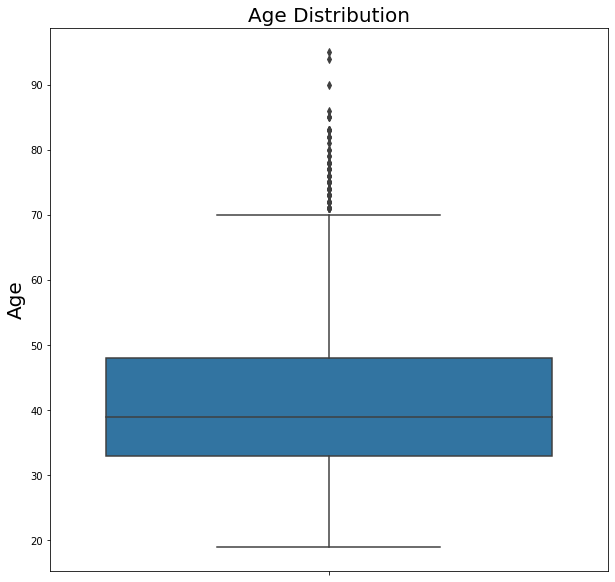

In [11]:
# boxplot for age variable
plt.figure(figsize=(10,10))
sns.boxplot(data=df['age']).set(xticklabels=[])
plt.ylabel("Age", size=20)
plt.title("Age Distribution", size=20)
plt.show()

In [12]:
# check for outliers in age variable
p0 = df.age.min()
p100 = df.age.max()
q1 = df.age.quantile(0.25)
q2 = df.age.quantile(0.50)
q3 = df.age.quantile(0.75)
iqr = q3 - q1

# lower cutoff and upper cutoff for age
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr

# If lc < p0 → There are NO Outliers on the lower side, If uc > p100 → There are NO Outliers on the higher side
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  19 , p100 =  95 , lc =  10.5 , uc =  70.5


In [13]:
# lets check the data with the outlier age variable
outlier_age = df[df['age']>uc]
outlier_age

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
29158,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,no
29261,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,no
29263,75,retired,married,primary,no,3324,no,no,cellular,2,feb,149,1,no
29322,83,retired,married,tertiary,no,6236,no,no,cellular,2,feb,283,2,no
29865,75,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33815,71,technician,married,tertiary,no,383,no,no,cellular,27,apr,388,3,yes
33827,72,self-employed,married,tertiary,no,132,no,no,cellular,27,apr,444,1,yes
33846,77,retired,married,secondary,no,1208,no,no,telephone,28,apr,72,4,no
33860,73,retired,married,primary,no,542,no,no,telephone,29,apr,107,5,no


In [14]:
# the target variable distribution in the outlier_age dataset
outlier_age['y'].value_counts()

no     42
yes    37
Name: y, dtype: int64

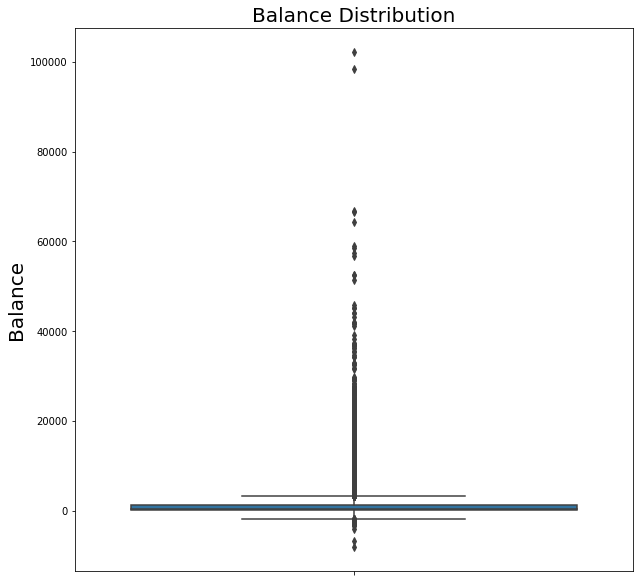

In [15]:
# check for outliers in balance variable
# boxplot for balance variable
plt.figure(figsize=(10,10))
sns.boxplot(data=df['balance']).set(xticklabels=[])
plt.ylabel("Balance", size=20)
plt.title("Balance Distribution", size=20)
plt.show()

In [16]:
# check for outliers in balance variable
p0 = df.balance.min()
p100 = df.balance.max()
q1 = df.balance.quantile(0.25)
q2 = df.balance.quantile(0.50)
q3 = df.balance.quantile(0.75)
iqr = q3 - q1

# lower cutoff and upper cutoff for balance
lc = q1 - 1.5*iqr
uc = q3 + 1.5*iqr

# If lc < p0 → There are NO Outliers on the lower side, If uc > p100 → There are NO Outliers on the higher side
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  -8019 , p100 =  102127 , lc =  -1843.5 , uc =  3216.5


In [17]:
# lets check the data with the outlier balance variable
outlier_balance = df[df['balance']>uc]
outlier_balance

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
34,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,no
65,51,management,married,tertiary,no,6530,yes,no,unknown,5,may,91,1,no
69,35,blue-collar,single,secondary,no,12223,yes,yes,unknown,5,may,177,1,no
70,57,blue-collar,married,secondary,no,5935,yes,yes,unknown,5,may,258,1,no
186,40,services,divorced,unknown,no,4384,yes,no,unknown,5,may,315,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39971,23,technician,single,secondary,no,4545,no,no,cellular,3,jun,200,1,no
39977,36,unemployed,married,tertiary,no,7222,yes,no,cellular,3,jun,86,1,no
39983,34,management,married,tertiary,no,3402,no,no,cellular,3,jun,88,2,no
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,no


In [18]:
# the target variable distribution in the outlier_balance dataset
outlier_balance['y'].value_counts()

no     3828
yes     429
Name: y, dtype: int64

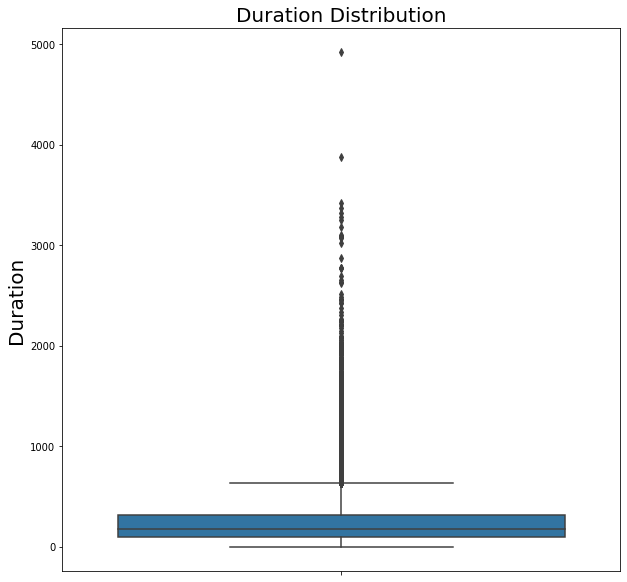

In [19]:
# check for outliers in duration variable
# boxplot for duration variable
plt.figure(figsize=(10,10))
sns.boxplot(data=df['duration']).set(xticklabels=[])
plt.ylabel("Duration", size=20)
plt.title("Duration Distribution", size=20)
plt.show()

In [20]:
# check for outliers in duration variable
p0 = df.duration.min()
p100 = df.duration.max()
q1 = df.duration.quantile(0.25)
q2 = df.duration.quantile(0.5)
q3 = df.duration.quantile(0.75)
iqr = q3 - q1

# lower cutoff and upper cutoff for duration
lc = q1 - iqr*1.5
uc = q3 + iqr*1.5

# If lc < p0 → There are NO Outliers on the lower side, If uc > p100 → There are NO Outliers on the higher side
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  0 , p100 =  4918 , lc =  -219.5 , uc =  632.5


In [21]:
# let's check the data with the outlier duration 
outlier_duration = df[df['duration'] > uc]
outlier_duration

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,no
43,54,retired,married,secondary,no,529,yes,no,unknown,5,may,1492,1,no
53,42,admin,single,secondary,no,-76,yes,no,unknown,5,may,787,1,no
59,46,services,married,primary,no,179,yes,no,unknown,5,may,1778,1,no
61,53,technician,divorced,secondary,no,989,yes,no,unknown,5,may,812,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39912,28,self-employed,single,tertiary,no,5215,no,no,cellular,2,jun,673,1,no
39915,26,admin,single,secondary,no,96,no,no,cellular,2,jun,696,1,no
39925,28,technician,single,tertiary,no,4987,no,no,cellular,2,jun,924,2,yes
39968,42,blue-collar,married,secondary,no,2913,no,no,cellular,3,jun,705,1,yes


In [22]:
# target variable distribution in the outlier_duration dataset
outlier_duration['y'].value_counts()

no     1560
yes    1440
Name: y, dtype: int64

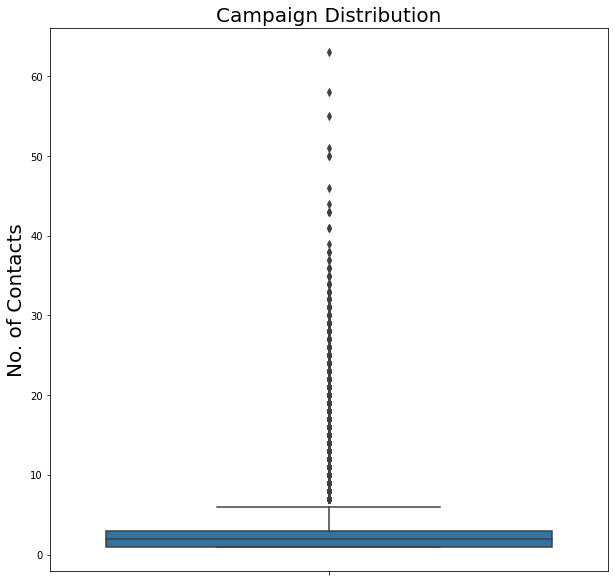

In [23]:
# check for outliers in campaign variable - boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=df['campaign']).set(xticklabels=[])
plt.ylabel("No. of Contacts", size=20)
plt.title("Campaign Distribution", size=20)
plt.show()

In [24]:
# check for outliers in campaign variable
p0 = df.campaign.min()
p100 = df.campaign.max()
q1 = df.campaign.quantile(0.25)
q2 = df.campaign.quantile(0.5)
q3 = df.campaign.quantile(0.75)
iqr = q3 - q1

# lower cutoff and upper cutoff for duration
lc = q1 - iqr*1.5
uc = q3 + iqr*1.5

# If lc < p0 → There are NO Outliers on the lower side, If uc > p100 → There are NO Outliers on the higher side
print( "p0 = " , p0 ,", p100 = " , p100 ,", lc = " , lc ,", uc = " , uc)

p0 =  1 , p100 =  63 , lc =  -2.0 , uc =  6.0


In [25]:
# let's check the data with the outlier campaign 
outlier_campaign = df[df['campaign'] > uc]
outlier_campaign

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
758,59,services,married,secondary,no,307,yes,yes,unknown,6,may,250,7,no
780,30,admin,married,secondary,no,4,no,no,unknown,7,may,172,8,no
906,27,services,single,secondary,no,0,yes,no,unknown,7,may,388,7,no
1103,52,technician,married,unknown,no,133,yes,no,unknown,7,may,253,8,no
1105,43,admin,married,tertiary,no,1924,yes,no,unknown,7,may,244,7,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39618,32,technician,married,tertiary,no,4089,no,no,cellular,26,may,114,7,no
39682,37,admin,married,secondary,no,7,yes,no,cellular,27,may,224,7,no
39728,23,student,single,unknown,no,565,no,no,cellular,28,may,162,7,no
39729,50,management,married,tertiary,no,253,no,no,cellular,28,may,513,9,yes


In [26]:
# target variable distribution in the outlier_campaign dataset
outlier_campaign['y'].value_counts()

no     2857
yes     135
Name: y, dtype: int64

* After exploring the outliers in the different numerical variables that is in the dataset. I've came to the conclusion that the outliers present are useful to the analysis and model.

### Univariate Analysis

#### Continuous Variables

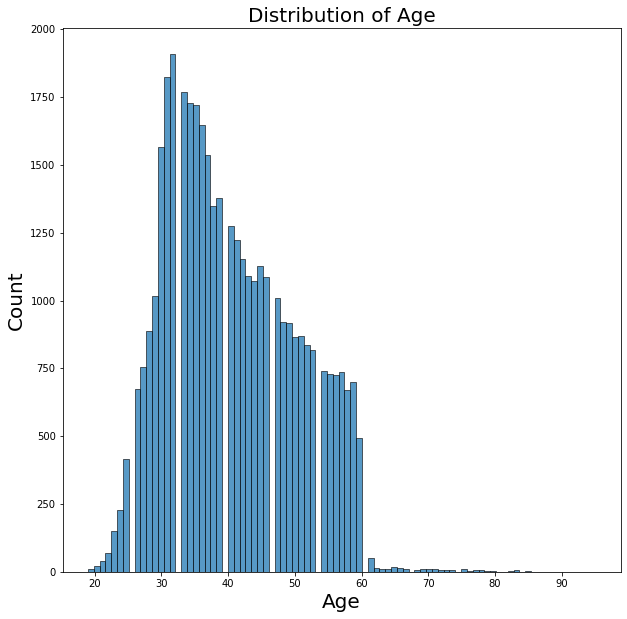

In [27]:
# distribution of age using a histogram
plt.figure(figsize=(10,10))
sns.histplot(data=df['age'])
plt.xlabel('Age', size=20)
plt.ylabel('Count', size=20)
plt.title("Distribution of Age", size=20)
plt.show()

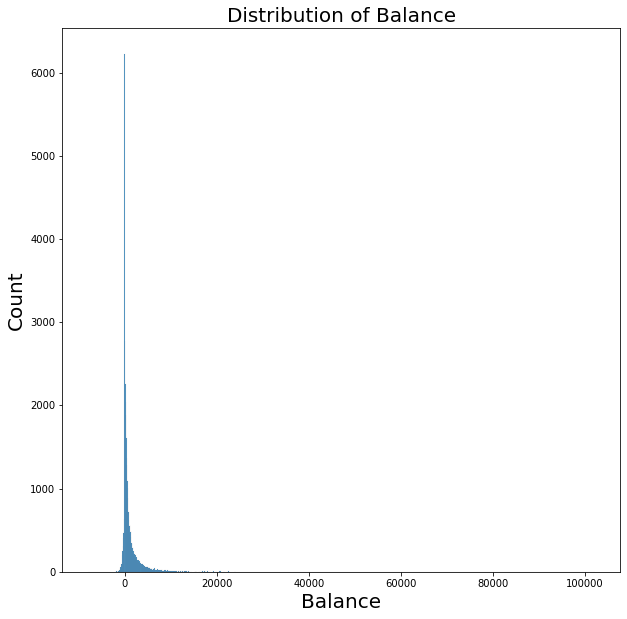

In [28]:
# distribution of balance
plt.figure(figsize=(10,10))
sns.histplot(data=df['balance'])
plt.xlabel('Balance', size=20)
plt.ylabel('Count', size=20)
plt.title("Distribution of Balance", size=20)
plt.show()

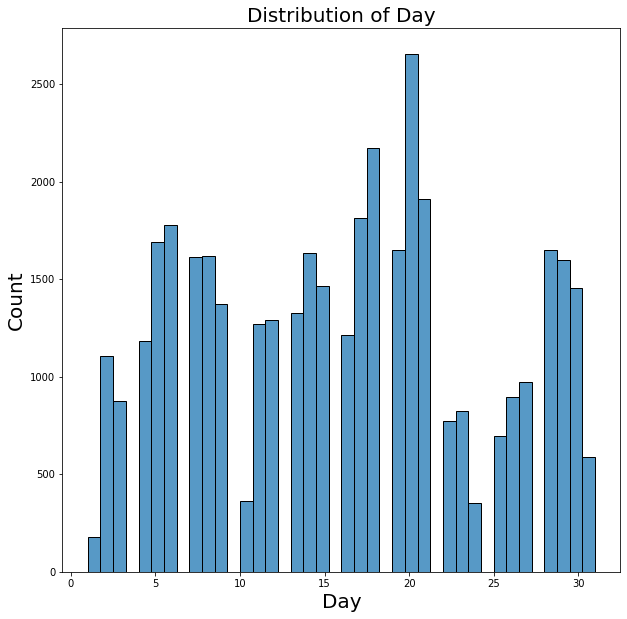

In [29]:
# distribution of the day variable
plt.figure(figsize=(10,10))
sns.histplot(data=df['day'])
plt.xlabel("Day", size=20)
plt.ylabel('Count', size=20)
plt.title("Distribution of Day", size=20)
plt.show()

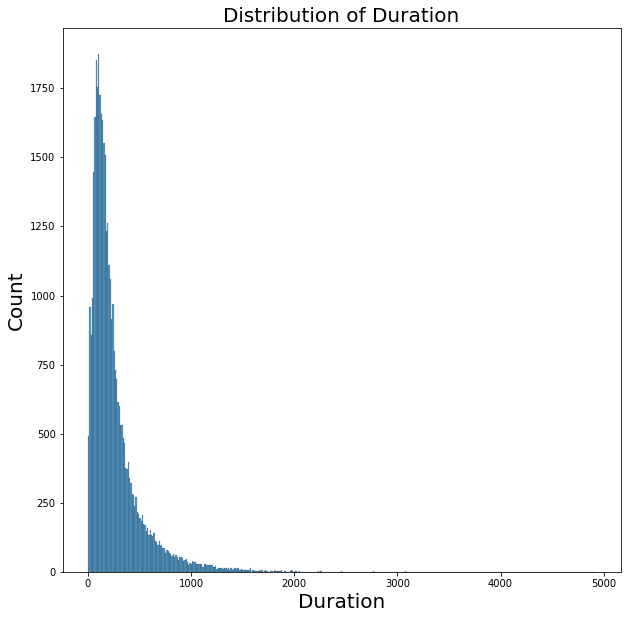

In [30]:
# distribution of duration variable
plt.figure(figsize=(10,10))
sns.histplot(data=df['duration'])
plt.xlabel("Duration", size=20)
plt.ylabel("Count", size=20)
plt.title("Distribution of Duration", size=20)
plt.show()

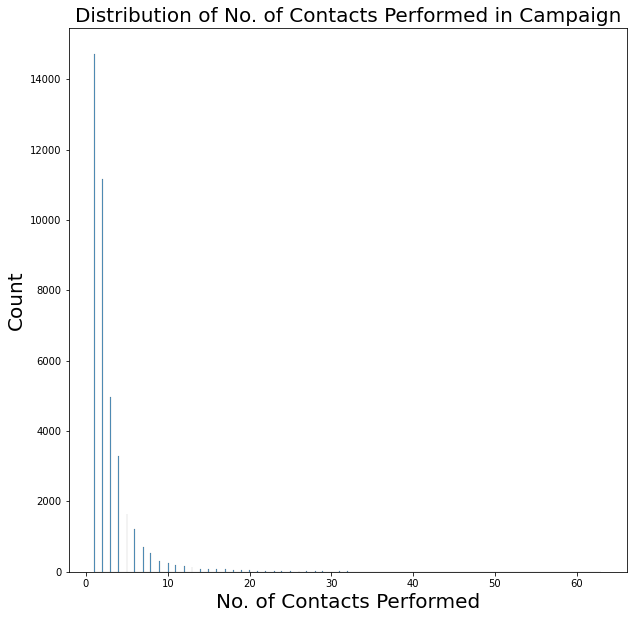

In [31]:
# distribution of campaign variable
plt.figure(figsize=(10,10))
sns.histplot(data=df['campaign'])
plt.xlabel("No. of Contacts Performed", size=20)
plt.ylabel("Count", size=20)
plt.title("Distribution of No. of Contacts Performed in Campaign", size=20)
plt.show()

#### Categorical Variables

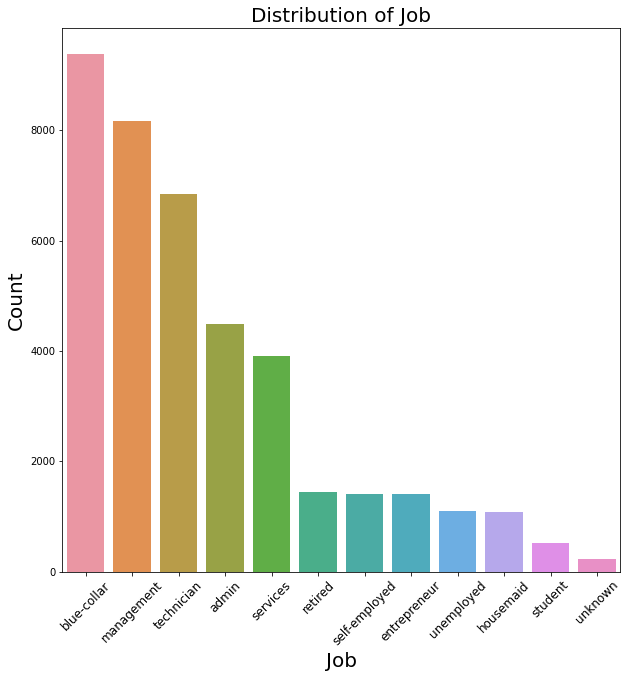

In [32]:
# distribution of job variable - countplot
plt.figure(figsize=(10,10))
sns.countplot(x='job', data=df, order=df['job'].value_counts().index)
plt.xlabel("Job", size=20)
plt.xticks(rotation=45, size=12)
plt.ylabel("Count", size=20)
plt.title("Distribution of Job", size=20)
plt.show()

In [33]:
# distribution of job variable - value counts
print(df['job'].value_counts())

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64


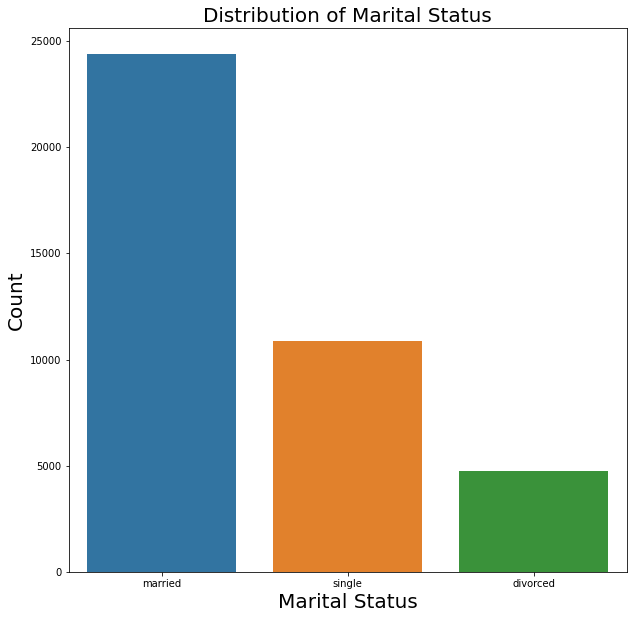

In [34]:
# distribution of marital variable - countplot
plt.figure(figsize=(10,10))
sns.countplot(x=df['marital'], order=df['marital'].value_counts().index)
plt.xlabel("Marital Status", size=20)
plt.ylabel("Count",size=20)
plt.title("Distribution of Marital Status", size=20)
plt.show()

In [35]:
# distribution of marital variable - value counts
print(df['marital'].value_counts())

married     24386
single      10889
divorced     4725
Name: marital, dtype: int64


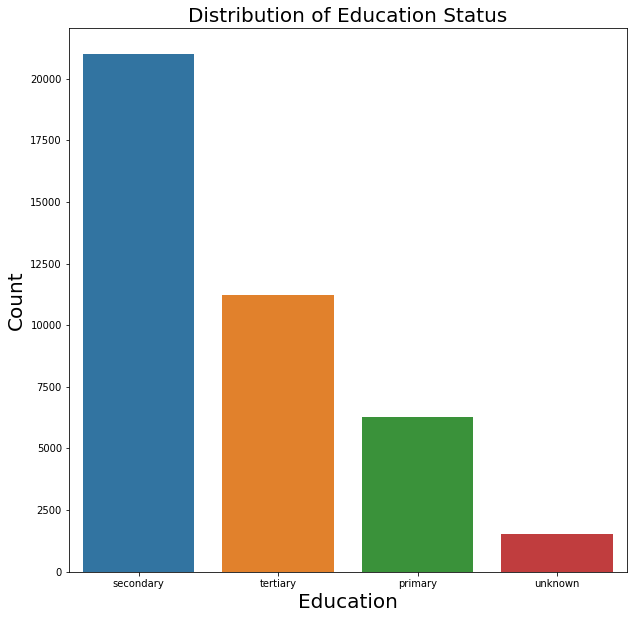

In [36]:
# distribution of education variable - countplot
plt.figure(figsize=(10,10))
sns.countplot(x=df['education'], order=df['education'].value_counts().index)
plt.xlabel("Education", size=20)
plt.ylabel("Count", size=20)
plt.title("Distribution of Education Status", size=20)
plt.show()

In [37]:
# distribution of education - value counts
print(df['education'].value_counts())

secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64


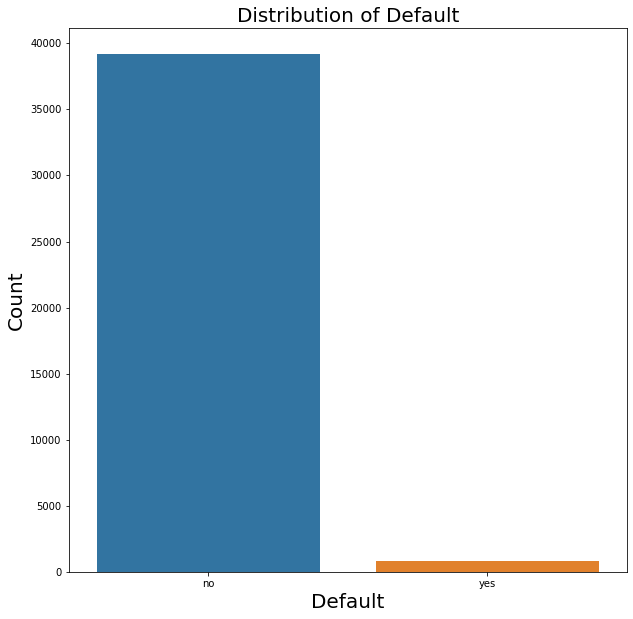

In [38]:
# distribution of default variable - countplot
plt.figure(figsize=(10,10))
sns.countplot(x=df['default'], order=df['default'].value_counts().index)
plt.xlabel("Default", size=20)
plt.ylabel("Count", size=20)
plt.title("Distribution of Default", size=20)
plt.show()

In [39]:
# distribution of default - value counts
print(df['default'].value_counts())

no     39191
yes      809
Name: default, dtype: int64


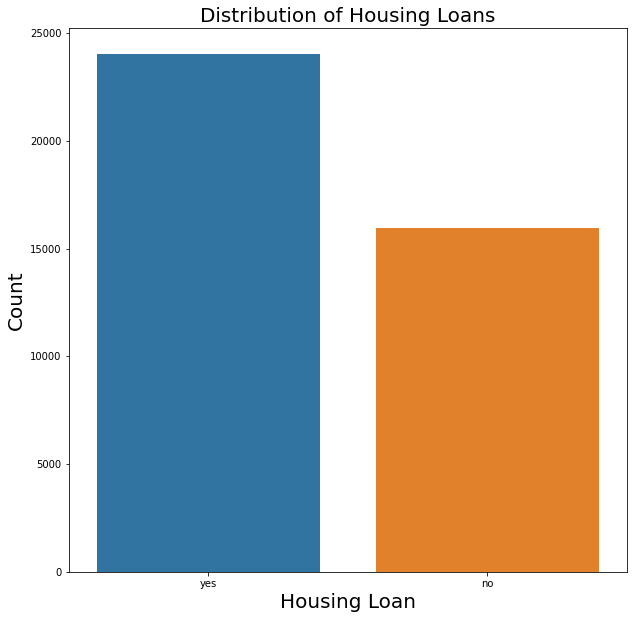

In [40]:
# distribution of housing variable - countplot
plt.figure(figsize=(10,10))
sns.countplot(x=df['housing'], order=df['housing'].value_counts().index)
plt.xlabel("Housing Loan", size=20)
plt.ylabel("Count", size=20)
plt.title("Distribution of Housing Loans", size=20)
plt.show()

In [41]:
# distribution of housing - value counts
print(df['housing'].value_counts())

yes    24031
no     15969
Name: housing, dtype: int64


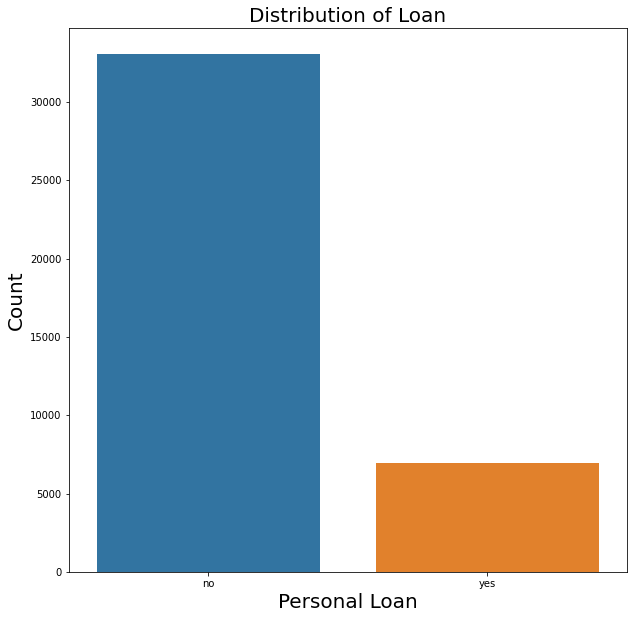

In [42]:
# distribution of loan - countplot
plt.figure(figsize=(10,10))
sns.countplot(x=df['loan'], order=df['loan'].value_counts().index)
plt.xlabel("Personal Loan", size=20)
plt.ylabel("Count", size=20)
plt.title("Distribution of Loan", size=20)
plt.show()

In [43]:
# distribution of loan - value counts
print(df['loan'].value_counts())

no     33070
yes     6930
Name: loan, dtype: int64


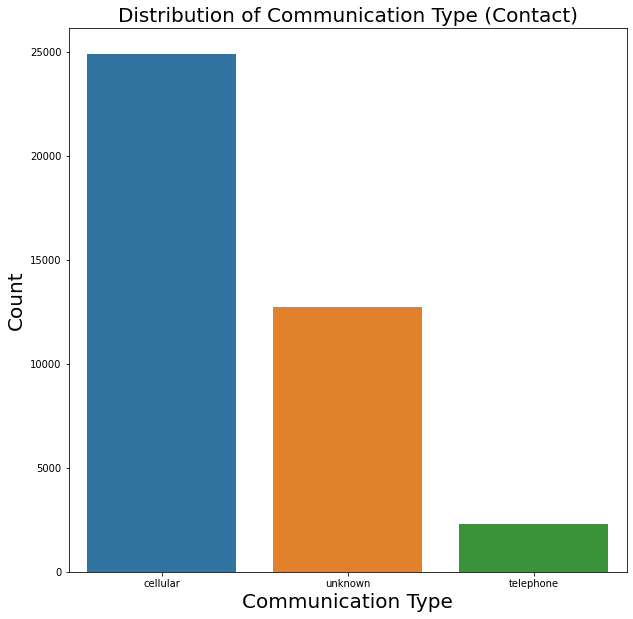

In [44]:
# distribution of contact - countplot
plt.figure(figsize=(10,10))
sns.countplot(x=df['contact'], order=df['contact'].value_counts().index)
plt.xlabel("Communication Type", size=20)
plt.ylabel("Count", size=20)
plt.title("Distribution of Communication Type (Contact)", size=20)
plt.show()

In [45]:
# distribution of contact - value counts
print(df['contact'].value_counts())

cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64


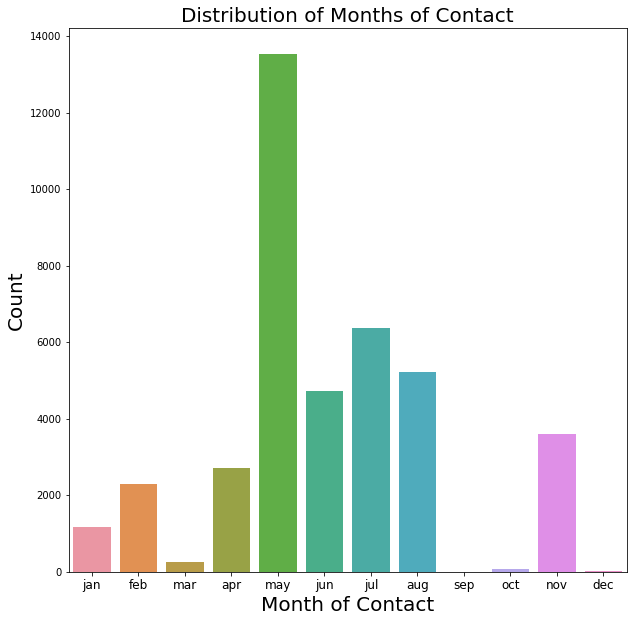

In [46]:
# distribution of month - countplot
plt.figure(figsize=(10,10))
sns.countplot(x=df['month'], order=["jan",'feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.xlabel("Month of Contact", size=20)
plt.xticks(size=12)
plt.ylabel("Count", size=20)
plt.title("Distribution of Months of Contact", size=20)
plt.show()

In [47]:
# distribution of months of contact - value counts
print(df['month'].value_counts())

may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: month, dtype: int64


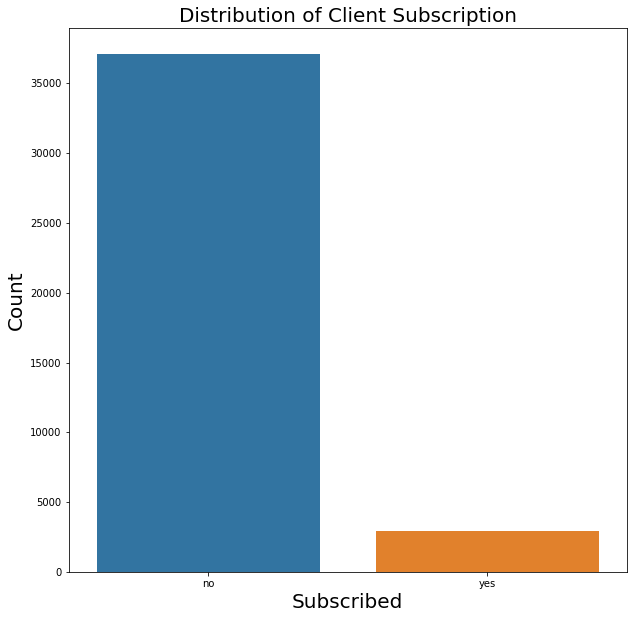

In [48]:
# distribution of y variable(client subscribed to term deposit) - countplot
plt.figure(figsize=(10,10))
sns.countplot(x=df['y'], order=df['y'].value_counts().index)
plt.xlabel("Subscribed", size=20)
plt.ylabel("Count", size=20)
plt.title("Distribution of Client Subscription", size=20)
plt.show()

In [49]:
# distribution of y variable(client subscribed to term deposit) - value counts
print(df['y'].value_counts())

no     37104
yes     2896
Name: y, dtype: int64


From the univariate analysis that i did on the variables in the dataset, i noticed the following:
* __Numerical Variables__:
    * __age__ is right skewed with most of the data following a normal distribution between 19-60 with the presence of outliers on the upper cutoff.
    * __balance__ is also right skewed and needs to be scaled for better modeling of the data.
    * __day__ can be considered to be normally distributed. 
    * __duration__ is right skewed and has outliers. It is better if it's feature scaled as well.
    * __campaign__ is right skewed and has outliers. It is better if it's feature scaled as well.
* __Categorical Variables__:
    * __Job__ is highly consisting of Blue-collar, Management, Technicians, Admins, Services, Retired, Self-Employed and the rest.
    * __Marital__ consist of married (24386), single (10889), divorced (4725).
    * __education__ consist of secondary (20993), tertiary (11206), primary (6270) and unknown (1531).
    * __default__ variable shows that 39191 has no credit in default and 809 does.
    * __housing__ shows that 24031 have housing loans and 15969 don't.
    * __loan__ shows that 33070 don't have a personal loan while 6930 do.
    * __contact__ shows the different type of communications used: cellular (24914), unknown (12765) and telephone (2321).
    * __month__ variable showed different number of communications in each month. May (13532) being the highest, followed by July, August and June. While March (258), October (80) and December (13) being the lowest months pf contact.
    * __y (client subscription)__ is very unevenly distributed which will cause problems in prediction model. It is divided into no (37104) and no (2896). 

### Multivariate Analysis

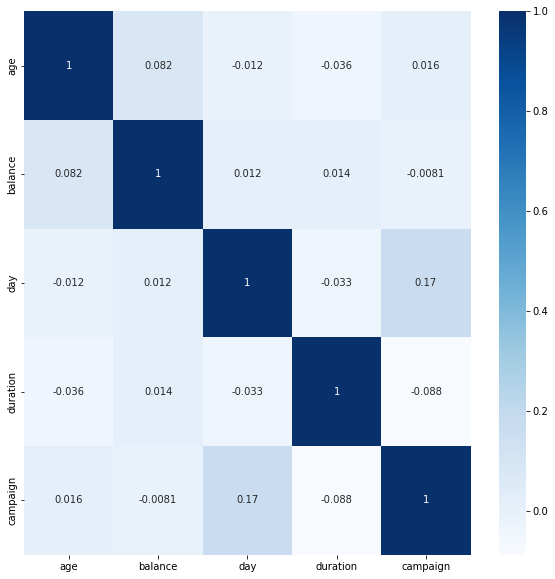

In [50]:
# correlation heatmap of the numerical variables in the dataset
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

From the correlation heatmap, it is showing that there is no correlation between the numerical variables with each other.

<Figure size 720x720 with 0 Axes>

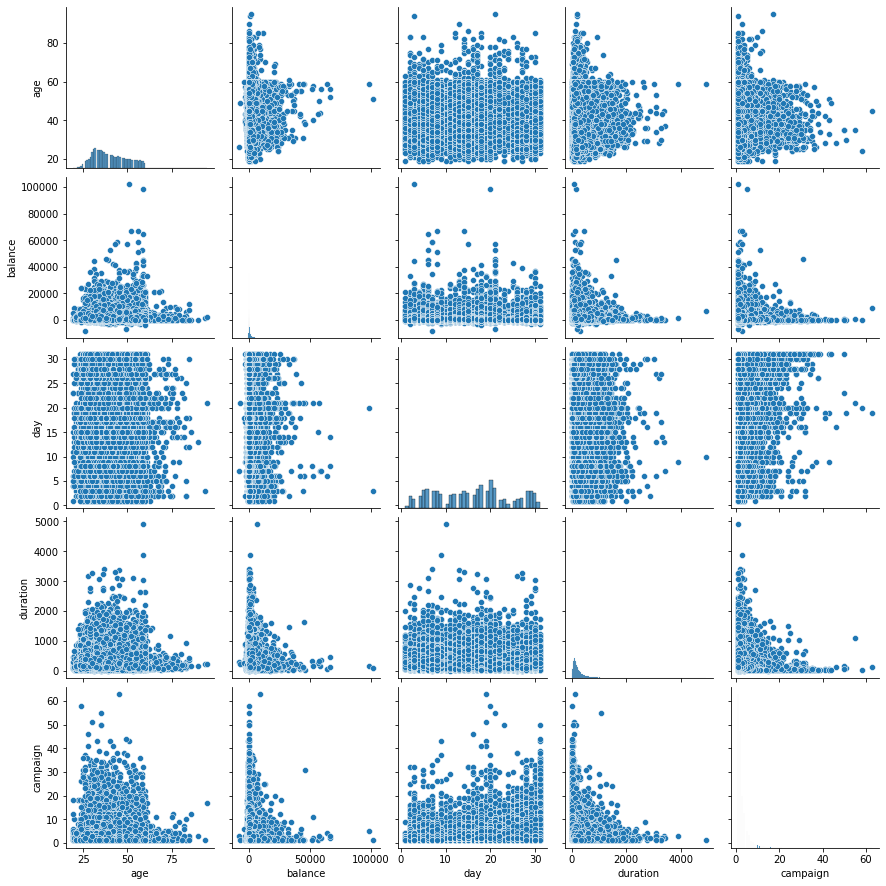

In [51]:
# pairplot of all the numerical variables 
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

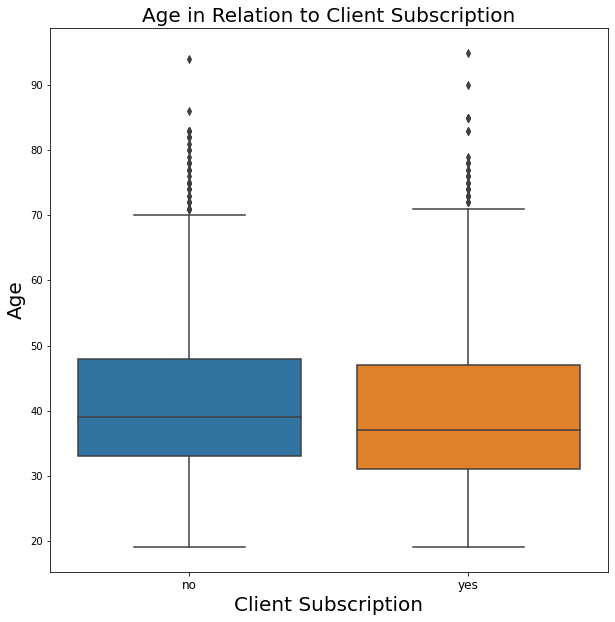

In [52]:
# age and y (client subscription) - boxplot
plt.figure(figsize=(10,10))
sns.boxplot(x=df['y'], y=df['age'])
plt.xlabel('Client Subscription', size=20)
plt.xticks(size=12)
plt.ylabel("Age", size=20)
plt.title("Age in Relation to Client Subscription", size=20)
plt.show()

In [53]:
# age and y (client subscription) - values
print(pd.crosstab(df['age'], df['y'])['yes'].sort_values(ascending=False)[:20])

age
32    149
30    134
31    132
33    127
35    127
34    117
36    114
29     98
39     97
37     97
28     88
38     87
41     83
40     82
26     81
46     76
27     70
47     69
42     67
43     65
Name: yes, dtype: int64


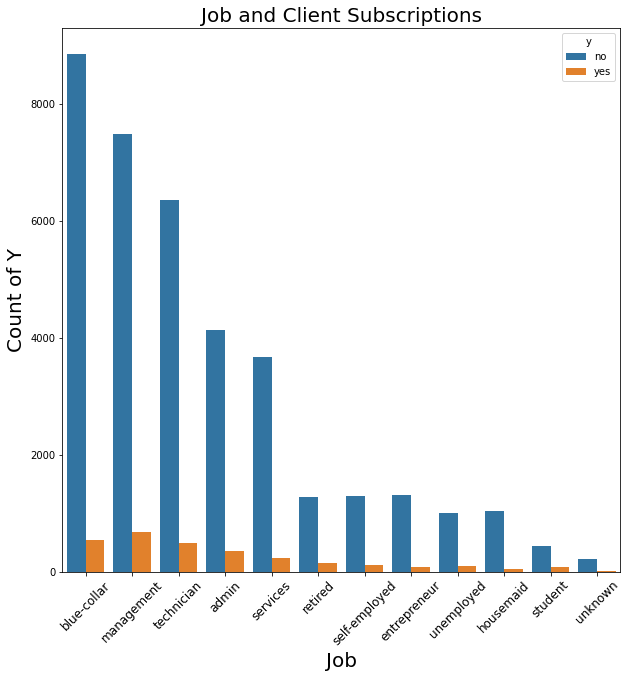

In [54]:
# job and y (client subscription) - countplot
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='job', hue='y', order=df.groupby('job')['y'].count().sort_values(ascending=False).index)
plt.xlabel("Job", size=20)
plt.xticks(rotation=45, size=12)
plt.ylabel("Count of Y", size=20)
plt.title("Job and Client Subscriptions", size=20)
plt.show()

In [55]:
# job and y (client subscription) - values
pd.crosstab(df['job'], df['y'])

y,no,yes
job,,
admin,4132,351
blue-collar,8848,535
entrepreneur,1317,88
housemaid,1034,53
management,7490,676
retired,1286,151
self-employed,1302,112
services,3672,238
student,442,82


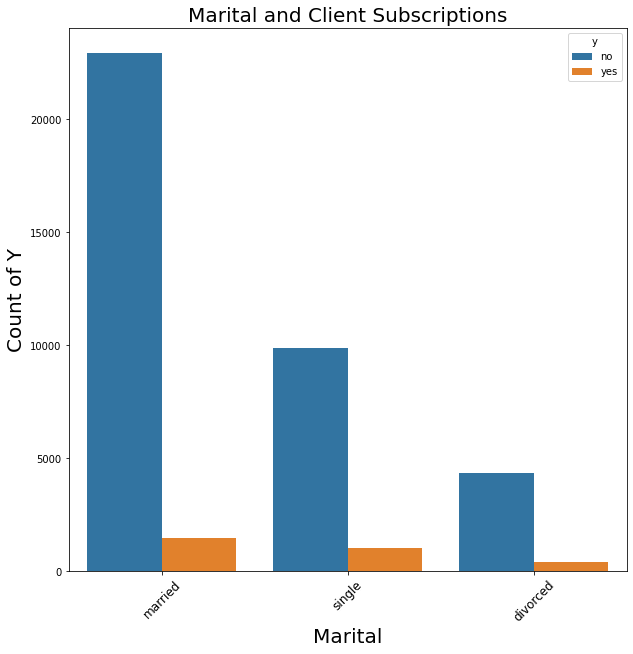

In [56]:
# marital status and y (client subscription) - plot
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='marital', hue='y', order=df.groupby('marital')['y'].count().sort_values(ascending=False).index)
plt.xlabel("Marital", size=20)
plt.xticks(rotation=45, size=12)
plt.ylabel("Count of Y", size=20)
plt.title("Marital and Client Subscriptions", size=20)
plt.show()

In [57]:
# marital and y (client subscription) - values
pd.crosstab(df['marital'], df['y'])

y,no,yes
marital,,
divorced,4334,391
married,22908,1478
single,9862,1027


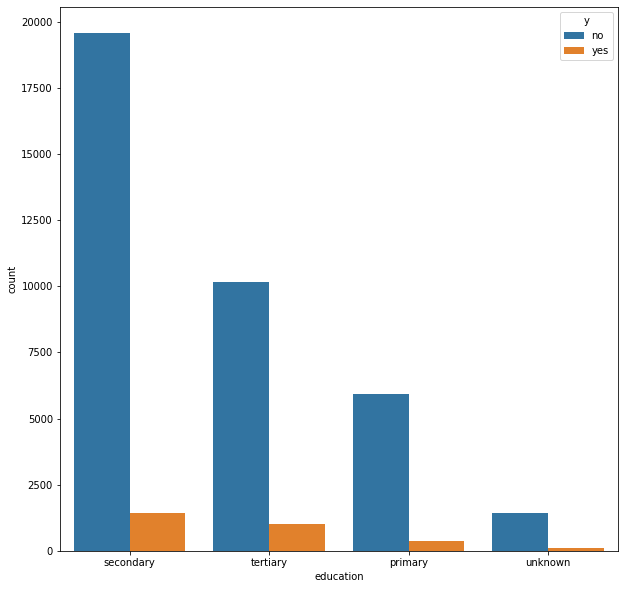

In [58]:
# education and y (client subscription) - countplot
plt.figure(figsize=(10,10))
sns.countplot(x=df['education'], hue=df['y'], order=df.groupby('education')['y'].count().sort_values(ascending=False).index)
plt.show()

In [59]:
# education and y (client subscription) - values
print(pd.crosstab(df['education'],df['y']))

y             no   yes
education             
primary     5917   353
secondary  19575  1418
tertiary   10177  1029
unknown     1435    96


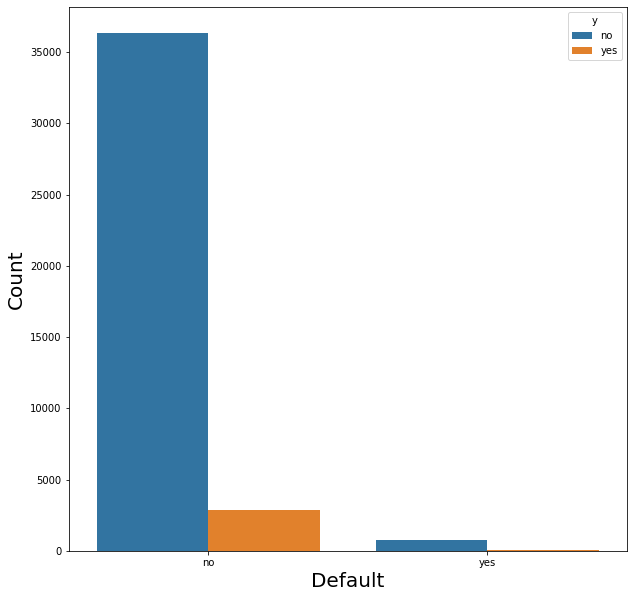

In [60]:
# default and y (client subscription) - countplot
plt.figure(figsize=(10,10))
sns.countplot(x=df['default'], hue=df['y'])
plt.xlabel("Default",size=20)
plt.ylabel('Count', size=20)
plt.show()

In [61]:
# default and y (client subscription) - values
print(pd.crosstab(df['default'], df['y']))

y           no   yes
default             
no       36344  2847
yes        760    49


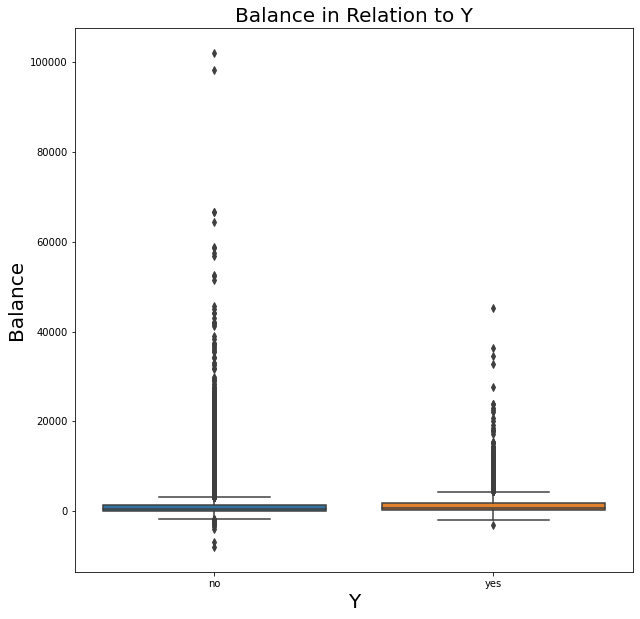

In [62]:
# balance and y (client subscription) - barplot
plt.figure(figsize=(10,10))
sns.boxplot(x=df['y'], y=df['balance'])
plt.xlabel("Y", size=20)
plt.ylabel('Balance', size=20)
plt.title("Balance in Relation to Y", size=20)
plt.show()

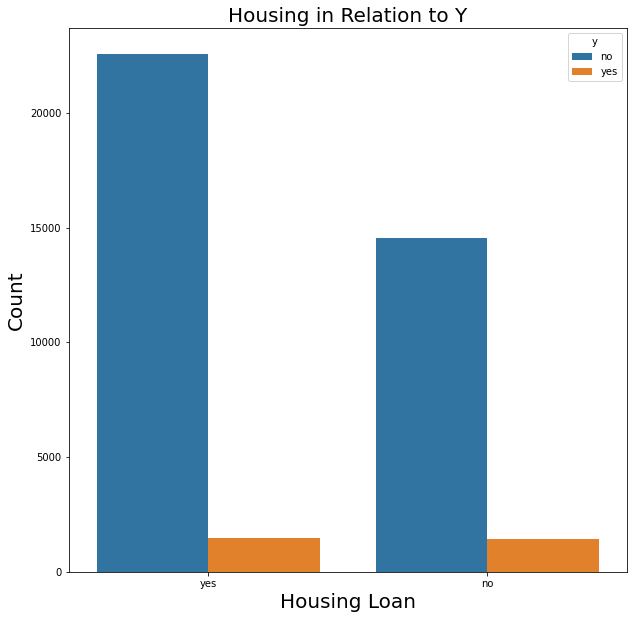

In [63]:
# housing and y (client subscription) - countplot
plt.figure(figsize=(10,10))
sns.countplot(x=df['housing'], hue=df['y'])
plt.xlabel("Housing Loan", size=20)
plt.ylabel("Count", size=20)
plt.title("Housing in Relation to Y", size=20)
plt.show()

In [64]:
# housing and y (client sunscription) - values
print(pd.crosstab(df['housing'], df['y']))

y           no   yes
housing             
no       14537  1432
yes      22567  1464


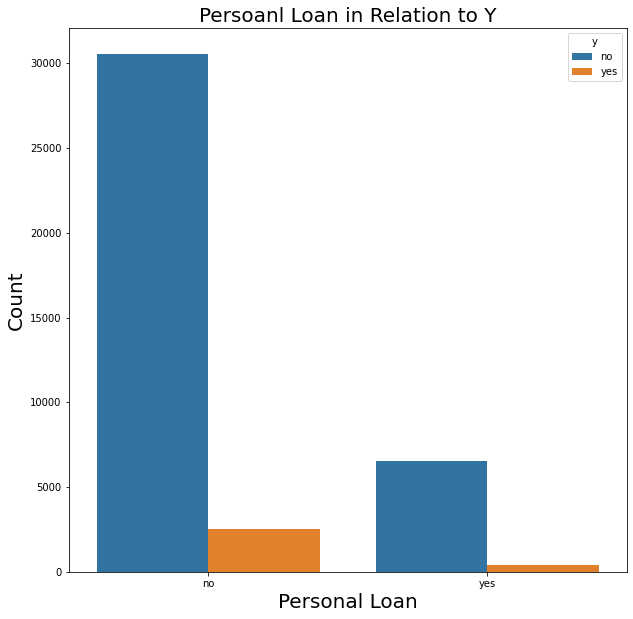

In [65]:
# loan and y (client subscription) - countplot
plt.figure(figsize=(10,10))
sns.countplot(x=df['loan'], hue=df['y'])
plt.xlabel("Personal Loan", size=20)
plt.ylabel("Count", size=20)
plt.title("Persoanl Loan in Relation to Y", size=20)
plt.show()

In [66]:
# loan and y (client subscription) - values
print(pd.crosstab(df['loan'], df['y']))

y        no   yes
loan             
no    30554  2516
yes    6550   380


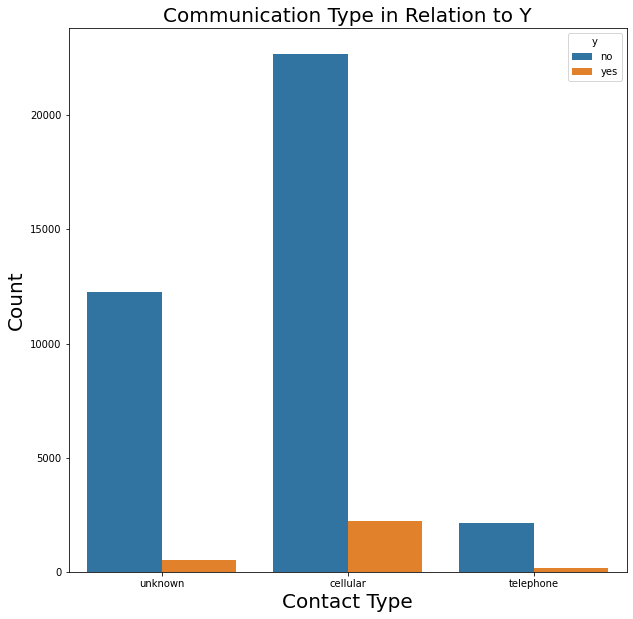

In [68]:
# contact (communication type) and y (client subscription) - countplot
plt.figure(figsize=(10,10))
sns.countplot(x=df['contact'], hue=df['y'])
plt.xlabel('Contact Type', size=20)
plt.ylabel("Count", size=20)
plt.title("Communication Type in Relation to Y", size=20)
plt.show()

In [69]:
# contact (commincation type) and y (client subscription) - values
print(pd.crosstab(df['contact'], df['y']))

y             no   yes
contact               
cellular   22681  2233
telephone   2155   166
unknown    12268   497


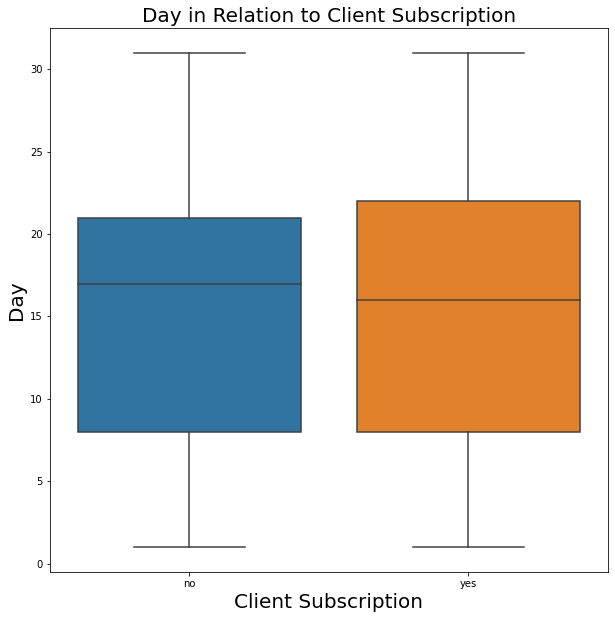

In [70]:
# day and y (client subscription) - boxplot
plt.figure(figsize=(10,10))
sns.boxplot(x=df['y'], y=df['day'])
plt.xlabel("Client Subscription", size=20)
plt.ylabel("Day", size=20)
plt.title("Day in Relation to Client Subscription", size=20)
plt.show()

In [71]:
# day and y (client subscription) - values
print(pd.crosstab(df['day'], df['y']))

y      no  yes
day           
1     136   40
2    1005  104
3     794   80
4    1066  117
5    1578  113
6    1668  110
7    1532   80
8    1518  102
9    1302   72
10    319   45
11   1187   85
12   1185  104
13   1208  117
14   1521  115
15   1345  123
16   1119   96
17   1697  115
18   2008  165
19   1577   73
20   2502  153
21   1775  139
22    693   80
23    764   59
24    320   32
25    623   72
26    834   61
27    890   84
28   1589   61
29   1551   49
30   1233  224
31    565   26


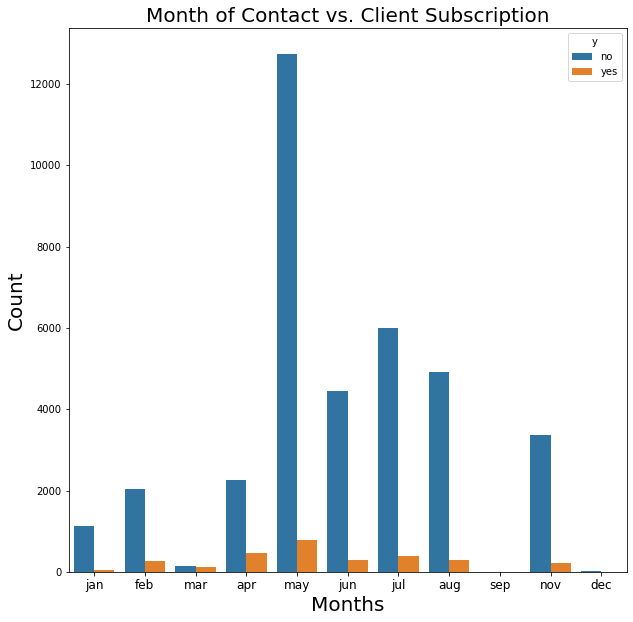

In [72]:
# month and y (client subscription) - countplot
plt.figure(figsize=(10,10))
sns.countplot(x=df['month'], hue=df['y'], order=['jan','feb','mar','apr','may','jun','jul','aug','sep','nov','dec'])
plt.xlabel('Months', size=20)
plt.xticks(size=12)
plt.ylabel("Count", size=20)
plt.title("Month of Contact vs. Client Subscription", size=20)
plt.show()

In [73]:
# month and y (client subscription) - values
df.groupby('month')['y'].count().sort_values(ascending=False)

month
may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: y, dtype: int64

In [74]:
# month and y (client subscription) - values
pd.crosstab(df['month'], df['y'])

y,no,yes
month,,
apr,2267,451
aug,4927,288
dec,12,1
feb,2041,255
jan,1138,38
jul,5996,384
jun,4440,294
mar,133,125
may,12741,791


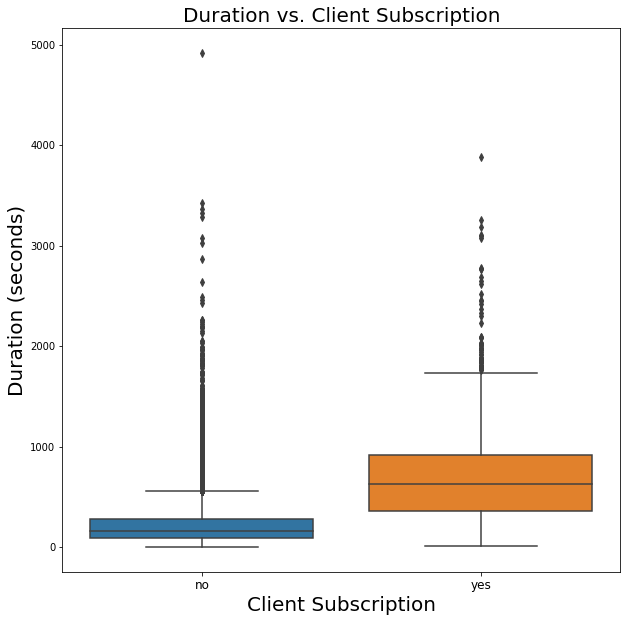

In [75]:
# duration and y (client subscription) - boxplot
plt.figure(figsize=(10,10))
sns.boxplot(x=df['y'], y=df['duration'])
plt.xlabel("Client Subscription", size=20)
plt.xticks(size=12)
plt.ylabel("Duration (seconds)", size=20)
plt.title("Duration vs. Client Subscription", size=20)
plt.show()

In [76]:
# duration and y (client subscription) - values
df.groupby('y')['duration'].median()

y
no     164.0
yes    629.0
Name: duration, dtype: float64

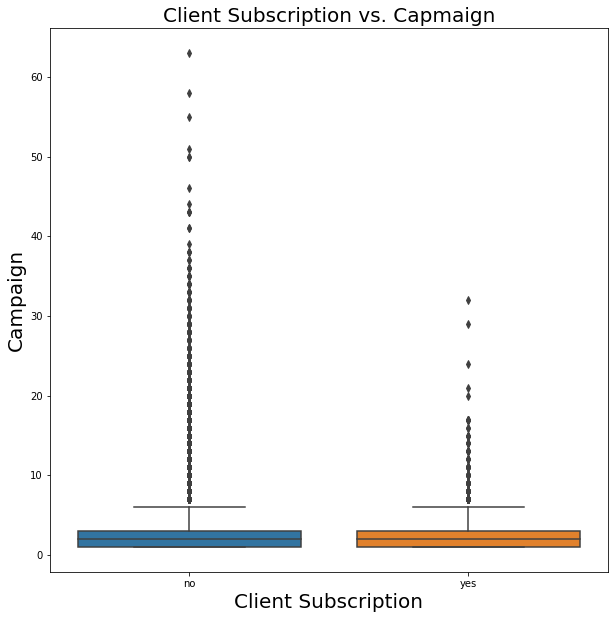

In [77]:
# campaign and y (client subscription) - boxplot
plt.figure(figsize=(10,10))
sns.boxplot(x=df['y'], y=df['campaign'])
plt.xlabel('Client Subscription', size=20)
plt.ylabel("Campaign", size=20)
plt.title('Client Subscription vs. Capmaign', size=20)
plt.show()

In [78]:
# campaign and y (client subscription) - values
(pd.crosstab(df['campaign'], df['y']))[:15]

y,no,yes
campaign,,
1,13454,1264
2,10393,760
3,4618,352
4,3075,222
5,1547,95
6,1160,68
7,664,35
8,501,25
9,299,19


## Preprocess Data

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


### Handling Skewed Data

From the exploratory analysis earlier, i noticed that all the numerical variables are skewed and the best way to fix a skewed data is to use __log transformation__.

There are 3 methods to solving skewed dataset:
1. Log Transformation.
2. Square Root Transformation.
3. Box-Cox Transformation (Requires Positive Values Only).

In [80]:
# create a copy of the dataframe
df1 = df.copy()

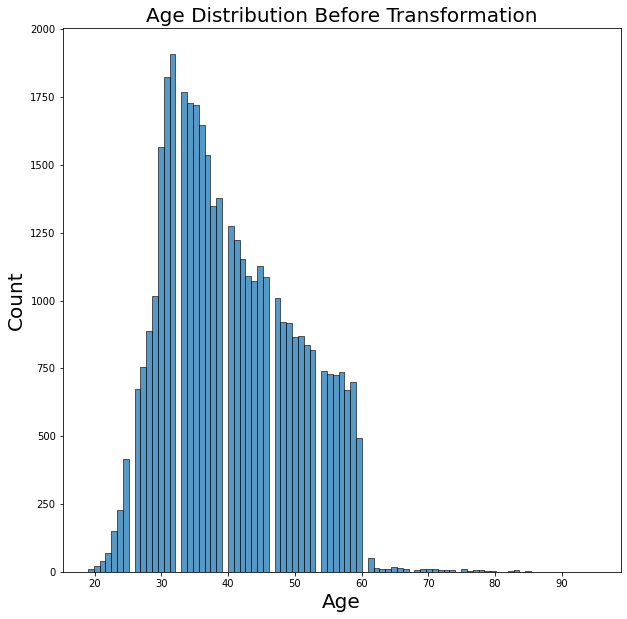

In [81]:
# age histplot
plt.figure(figsize=(10,10))
sns.histplot(data=df1['age'])
plt.xlabel("Age", size=20)
plt.ylabel("Count", size=20)
plt.title("Age Distribution Before Transformation", size=20)
plt.show()

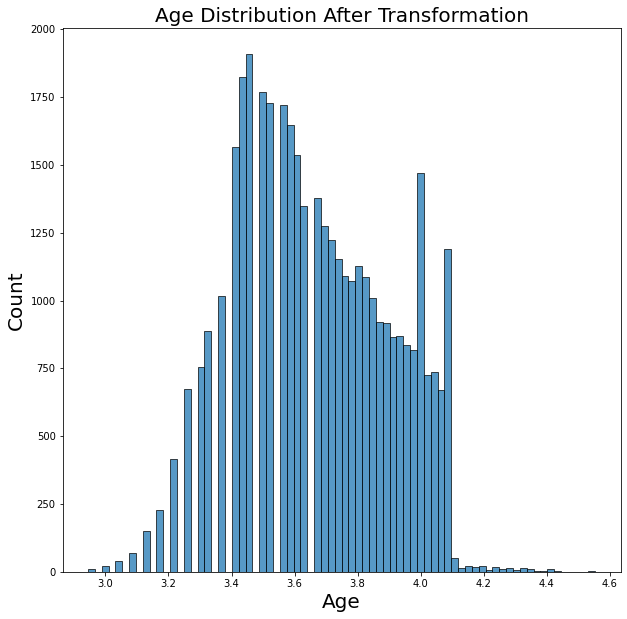

In [82]:
# age log transformation
df1['age'] = np.log(df1['age'])

# age histplot after transformation
plt.figure(figsize=(10,10))
sns.histplot(data=df1['age'])
plt.xlabel("Age", size=20)
plt.ylabel("Count", size=20)
plt.title("Age Distribution After Transformation", size=20)
plt.show()

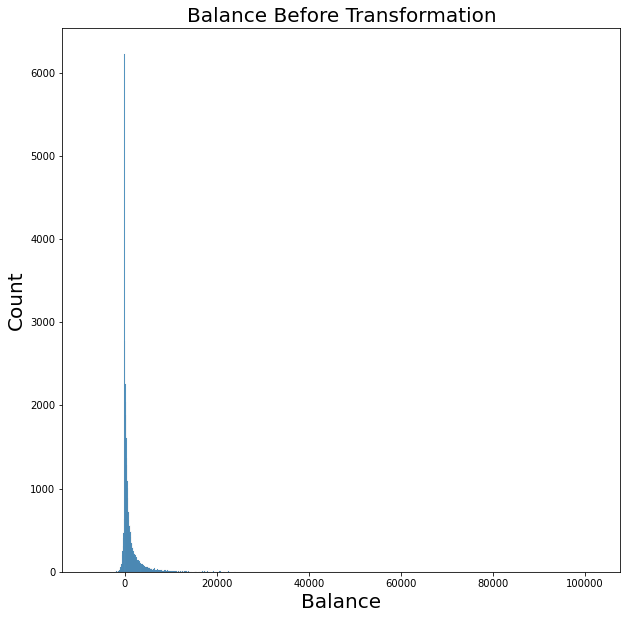

In [83]:
# balance variable
plt.figure(figsize=(10,10))
sns.histplot(data=df1['balance'])
plt.xlabel("Balance", size=20)
plt.ylabel("Count", size=20)
plt.title("Balance Before Transformation", size=20)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


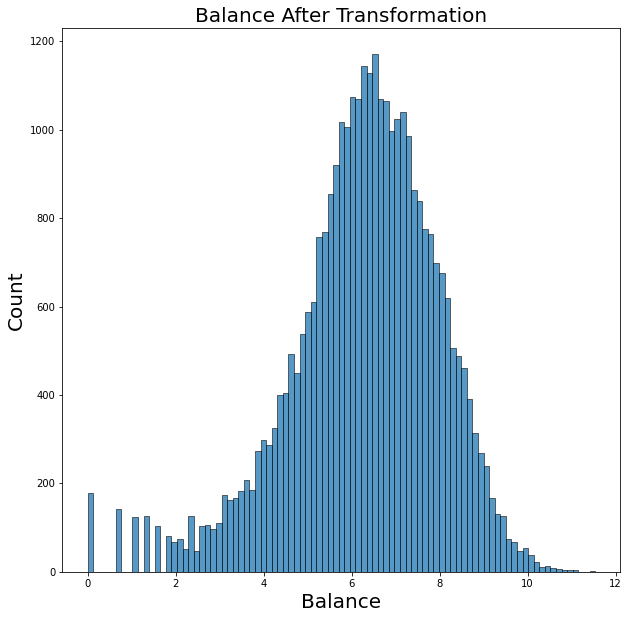

In [84]:
# balance log transformation
df1['balance'] = np.log(df1['balance'])

# balance histogram after transformation
plt.figure(figsize=(10,10))
sns.histplot(data=df1['balance'])
plt.xlabel("Balance", size=20)
plt.ylabel("Count", size=20)
plt.title("Balance After Transformation", size=20)
plt.show()

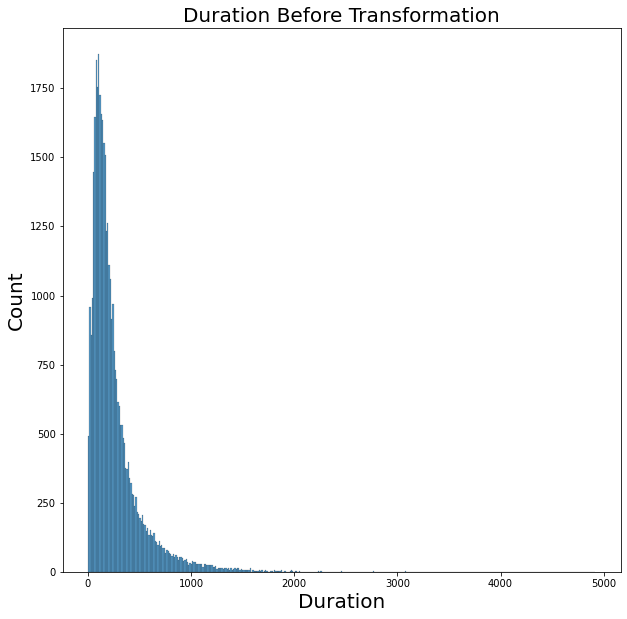

In [85]:
# duration variable
plt.figure(figsize=(10,10))
sns.histplot(data=df1['duration'])
plt.xlabel("Duration", size=20)
plt.ylabel("Count", size=20)
plt.title("Duration Before Transformation", size=20)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


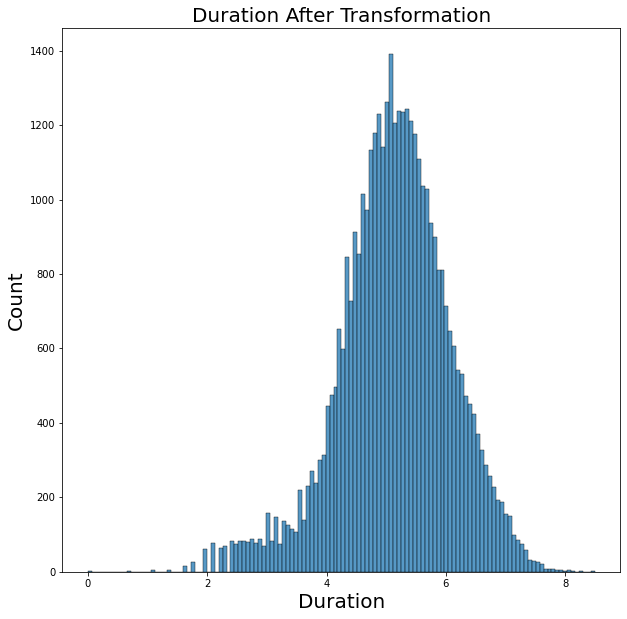

In [86]:
# duration log transformation
df1['duration'] = np.log(df1['duration'])

# duration histplot after transformation
plt.figure(figsize=(10,10))
sns.histplot(data=df1['duration'])
plt.xlabel('Duration', size=20)
plt.ylabel("Count", size=20)
plt.title("Duration After Transformation", size=20)
plt.show()

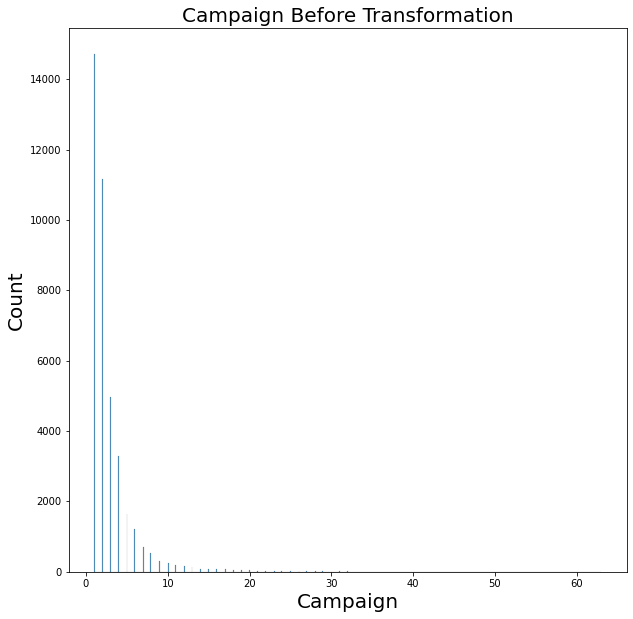

In [87]:
# campaign variable
plt.figure(figsize=(10,10))
sns.histplot(data=df1['campaign'])
plt.xlabel("Campaign", size=20)
plt.ylabel("Count", size=20)
plt.title("Campaign Before Transformation", size=20)
plt.show()

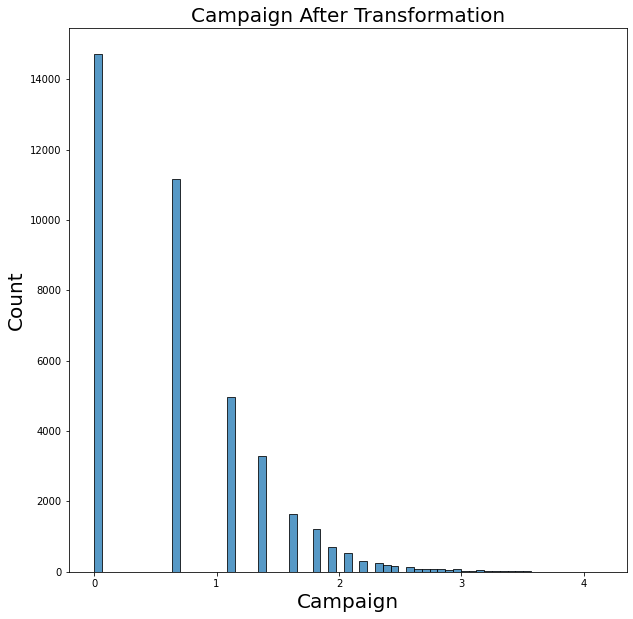

In [88]:
# campaign log transformation
df1['campaign'] = np.log(df1['campaign'])

# campaign histplot after transformation
plt.figure(figsize=(10,10))
sns.histplot(data=df1['campaign'])
plt.xlabel("Campaign", size=20)
plt.ylabel("Count", size=20)
plt.title("Campaign After Transformation", size=20)
plt.show()

In [89]:
# statistical summary
df1.describe()

,age,balance,day,duration,campaign
count,40000.000000,3.626900e+04,40000.000000,4.000000e+04,40000.000000
mean,3.674313,-inf,16.017225,-inf,0.741038
std,0.237414,NaN,8.278127,NaN,0.724017
min,2.944439,-inf,1.000000,-inf,0.000000
25%,3.496508,4.897840e+00,8.000000,4.605170e+00,0.000000
50%,3.663562,6.228511e+00,17.000000,5.164786e+00,0.693147
75%,3.871201,7.299797e+00,21.000000,5.746203e+00,1.098612
max,4.553877,1.153397e+01,31.000000,8.500657e+00,4.143135


In [90]:
# creating a different copy of the dataframe
df2 = df.copy()

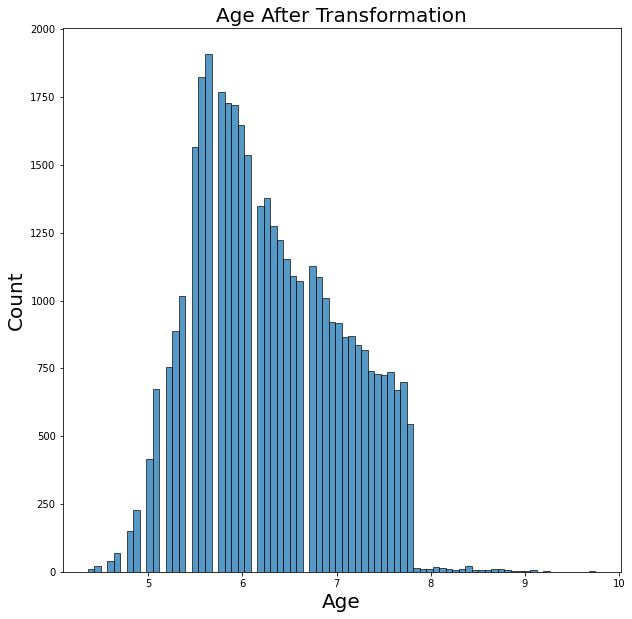

In [91]:
# age variable square root transformation
df2['age'] = np.sqrt(df2['age'])

# age variable distribution plot
plt.figure(figsize=(10,10))
sns.histplot(data=df2['age'])
plt.xlabel("Age", size=20)
plt.ylabel("Count", size=20)
plt.title("Age After Transformation", size=20)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


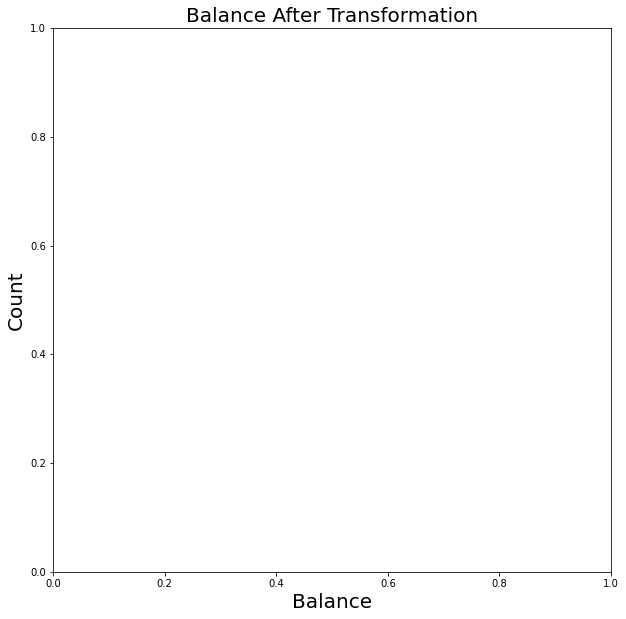

In [92]:
# balance variable square root transformation
df2['balance'] = np.sqrt(df2['balance'])

# balance histogram after transformation
plt.figure(figsize=(10,10))
sns.histplot(adta=df2['balance'])
plt.xlabel("Balance", size=20)
plt.ylabel("Count", size=20)
plt.title("Balance After Transformation", size=20)
plt.show()

In [93]:
df2.describe()

,age,balance,day,duration,campaign
count,40000.000000,36269.000000,40000.000000,40000.000000,40000.000000
mean,6.323020,28.392697,16.017225,254.824300,2.882175
std,0.751017,25.141190,8.278127,259.366498,3.239051
min,4.358899,0.000000,1.000000,0.000000,1.000000
25%,5.744563,11.575837,8.000000,100.000000,1.000000
50%,6.244998,22.516660,17.000000,175.000000,2.000000
75%,6.928203,38.470768,21.000000,313.000000,3.000000
max,9.746794,319.573153,31.000000,4918.000000,63.000000


After trying the two methods:
1. Log Transformation: Results in +/- inf results which cannot be worked with.
2. Square Root Transformation: Encountered values that gives invalid outputs.

### Features Scaling

#### Numerical Variables

In [94]:
# creating a variable consisting of the numerical variables in the dataset
num_cols = df.select_dtypes(include=['number']).copy()
num_cols

,age,balance,day,duration,campaign
0,58,2143,5,261,1
1,44,29,5,151,1
2,33,2,5,76,1
3,47,1506,5,92,1
4,33,1,5,198,1
...,...,...,...,...,...
39995,53,395,3,107,1
39996,30,3340,3,238,3
39997,54,200,3,170,1
39998,34,1047,3,342,1


In [95]:
# importing standardscaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fitting and transforming numerical variables using scaler
num_cols = scaler.fit_transform(num_cols)
num_cols

array([[ 1.81041533,  0.29917431, -1.33090037,  0.02381101, -0.58109559],
       [ 0.35838246, -0.42885395, -1.33090037, -0.40030458, -0.58109559],
       [-0.78250052, -0.43815233, -1.33090037, -0.6894743 , -0.58109559],
       ...,
       [ 1.3955488 , -0.36996425, -1.57250393, -0.32704825, -0.58109559],
       [-0.67878388, -0.0782708 , -1.57250393,  0.3361143 , -0.58109559],
       [-0.26391735,  0.05776097, -1.57250393, -0.54681724, -0.58109559]])

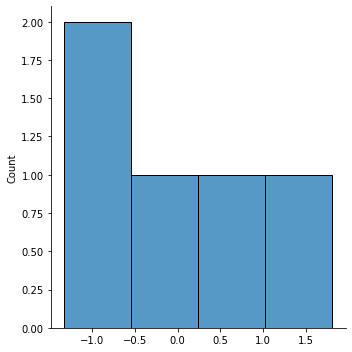

In [96]:
sns.displot(data=num_cols[0])

#### Categorical Variables

In [97]:
# variable with all the categorical columns
cat_cols = df.select_dtypes(include=['object']).copy()
cat_cols

,job,marital,education,default,housing,loan,contact,month,y
0,management,married,tertiary,no,yes,no,unknown,may,no
1,technician,single,secondary,no,yes,no,unknown,may,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,no
4,unknown,single,unknown,no,no,no,unknown,may,no
...,...,...,...,...,...,...,...,...,...
39995,technician,married,tertiary,no,no,no,cellular,jun,no
39996,management,single,tertiary,no,no,no,cellular,jun,yes
39997,admin,divorced,secondary,no,no,no,cellular,jun,yes
39998,management,married,tertiary,no,no,no,cellular,jun,no


In [98]:
# changing job variable to dtype of category
cat_cols['job'] = cat_cols['job'].astype('category')
cat_cols.dtypes

job          category
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
y              object
dtype: object

In [99]:
# changing all the object columns to category type
for col in cat_cols:
    cat_cols[col] = cat_cols[col].astype('category')

In [100]:
# check dtypes of variables in cat_cols
cat_cols.dtypes

job          category
marital      category
education    category
default      category
housing      category
loan         category
contact      category
month        category
y            category
dtype: object

In [101]:
# changing from category to encoded variables using cat.codes
for col in cat_cols:
    cat_cols[col] = cat_cols[col].cat.codes

In [102]:
# display the categorical data
cat_cols.head()

,job,marital,education,default,housing,loan,contact,month,y
0,4,1,2,0,1,0,2,8,0
1,9,2,1,0,1,0,2,8,0
2,2,1,1,0,1,1,2,8,0
3,1,1,3,0,1,0,2,8,0
4,11,2,3,0,0,0,2,8,0


In [103]:
cat_cols.dtypes

job          int8
marital      int8
education    int8
default      int8
housing      int8
loan         int8
contact      int8
month        int8
y            int8
dtype: object

In [104]:
df.select_dtypes(['number']).columns

Index(['age', 'balance', 'day', 'duration', 'campaign'], dtype='object')

In [105]:
# create a dataframe of the standardized numerical variables
num_cols = pd.DataFrame(data=num_cols, columns=df.select_dtypes(include=['number']).columns)
num_cols

,age,balance,day,duration,campaign
0,1.810415,0.299174,-1.330900,0.023811,-0.581096
1,0.358382,-0.428854,-1.330900,-0.400305,-0.581096
2,-0.782501,-0.438152,-1.330900,-0.689474,-0.581096
3,0.669532,0.079802,-1.330900,-0.627785,-0.581096
4,-0.782501,-0.438497,-1.330900,-0.219092,-0.581096
...,...,...,...,...,...
39995,1.291832,-0.302809,-1.572504,-0.569951,-0.581096
39996,-1.093650,0.711402,-1.572504,-0.064868,0.036377
39997,1.395549,-0.369964,-1.572504,-0.327048,-0.581096
39998,-0.678784,-0.078271,-1.572504,0.336114,-0.581096


In [106]:
# final dataframe
df3 = pd.concat([num_cols, cat_cols], axis=1)
df3

,age,balance,day,duration,campaign,job,marital,education,default,housing,loan,contact,month,y
0,1.810415,0.299174,-1.330900,0.023811,-0.581096,4,1,2,0,1,0,2,8,0
1,0.358382,-0.428854,-1.330900,-0.400305,-0.581096,9,2,1,0,1,0,2,8,0
2,-0.782501,-0.438152,-1.330900,-0.689474,-0.581096,2,1,1,0,1,1,2,8,0
3,0.669532,0.079802,-1.330900,-0.627785,-0.581096,1,1,3,0,1,0,2,8,0
4,-0.782501,-0.438497,-1.330900,-0.219092,-0.581096,11,2,3,0,0,0,2,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1.291832,-0.302809,-1.572504,-0.569951,-0.581096,9,1,2,0,0,0,0,6,0
39996,-1.093650,0.711402,-1.572504,-0.064868,0.036377,4,2,2,0,0,0,0,6,1
39997,1.395549,-0.369964,-1.572504,-0.327048,-0.581096,0,0,1,0,0,0,0,6,1
39998,-0.678784,-0.078271,-1.572504,0.336114,-0.581096,4,1,2,0,0,0,0,6,0


### Train Test Split

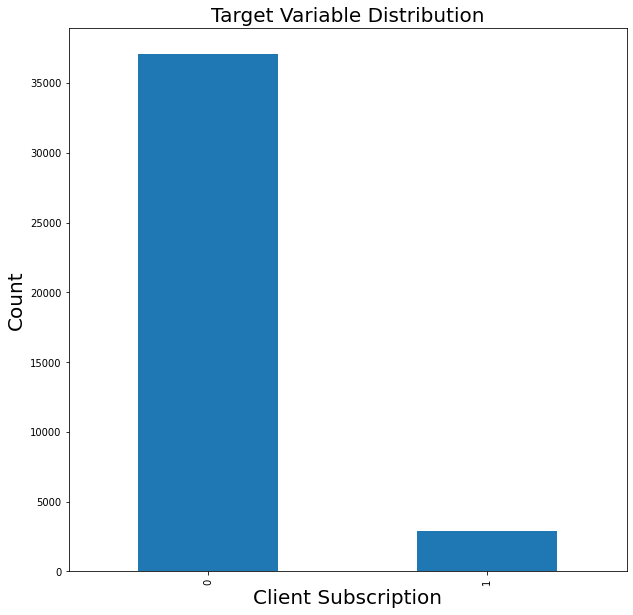

In [107]:
# target variable distribution - countplot
plt.figure(figsize=(10,10))
df3['y'].value_counts().plot(kind='bar')
plt.xlabel("Client Subscription", size=20)
plt.ylabel("Count", size=20)
plt.title("Target Variable Distribution", size=20)
plt.show()

In [108]:
# target variable distribution
print(df3['y'].value_counts())

0    37104
1     2896
Name: y, dtype: int64


In [110]:
# importing random over sampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

In [111]:
# importing train test split 
from sklearn.model_selection import train_test_split

# lets split our data into X and y
X = df3.iloc[:,:-1]
y = df3.iloc[:,-1]

# check X and y
print("X shape is:",X.shape)
print("y shape is:",y.shape)

X shape is: (40000, 13)
y shape is: (40000,)


In [112]:
# oversampling the minority class in the target variable
X_resampled, y_resampled = ros.fit_resample(X, y)

# X_resampled and y_resampled shapes
print("X_resampled shape is:",X_resampled.shape)
print("y_resampled shape is:",y_resampled.shape)

X_resampled shape is: (74208, 13)
y_resampled shape is: (74208,)


In [113]:
# target variable distribution after oversampling
y_resampled.value_counts()

0    37104
1    37104
Name: y, dtype: int64

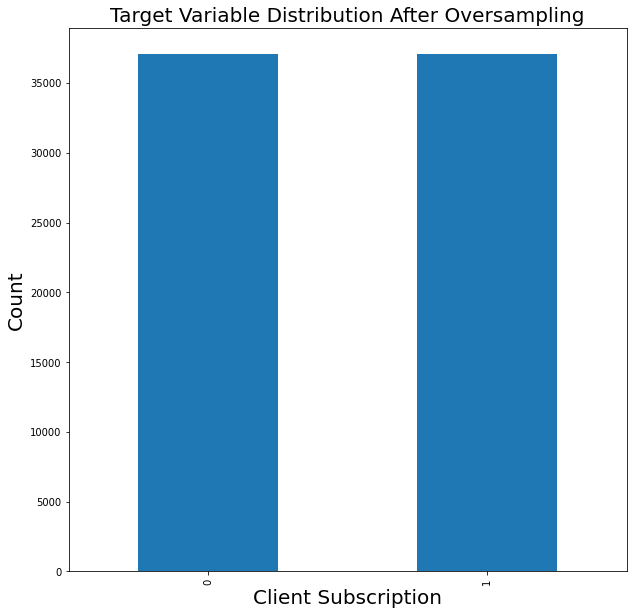

In [114]:
# target variable distribution after oversampling plot
plt.figure(figsize=(10,10))
y_resampled.value_counts().plot(kind='bar')
plt.xlabel("Client Subscription", size=20)
plt.ylabel("Count", size=20)
plt.title("Target Variable Distribution After Oversampling", size=20)
plt.show()

In [115]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# the shapes of the split
print("X_train shape is:",X_train.shape)
print("y_train shape is:",y_train.shape)
print("X_test shape is:",X_test.shape)
print("y_test shape is:",y_test.shape)

X_train shape is: (55656, 13)
y_train shape is: (55656,)
X_test shape is: (18552, 13)
y_test shape is: (18552,)


In [116]:
print(X_train.head())
print(y_train.head())

            age   balance       day  duration  campaign  job  marital  \
24670  1.188116 -0.438841  0.118721 -0.153546  0.036377    9        0   
265   -1.093650 -0.430231 -1.330900 -0.639352 -0.272359    8        2   
647   -0.989934 -0.352056 -1.210099 -0.307770  0.036377    8        2   
20300 -0.678784 -0.293855 -0.606090  0.494194  0.036377    4        2   
9861  -0.471351  0.268524 -0.847693  0.474916 -0.581096    1        2   

       education  default  housing  loan  contact  month  
24670          1        0        0     0        1      9  
265            2        0        1     0        2      8  
647            1        0        1     0        2      8  
20300          2        0        0     0        0      1  
9861           3        0        0     0        2      6  
24670    0
265      0
647      0
20300    0
9861     0
Name: y, dtype: int8


## Model Training

### Logistic Regression

In [117]:
# importing logistic regression
from sklearn.linear_model import LogisticRegression

# instance of model
logreg = LogisticRegression()

# train model on training data
logreg.fit(X_train, y_train)

# logistic regression predictions
logreg_preds = logreg.predict(X_test)

In [119]:
# importing metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score

# Calculating the accuracy of classifier
print(f"Accuracy of the Logistic Regression is: {accuracy_score(y_test, logreg_preds):.2f}")

Accuracy of the Logistic Regression is: 0.81


In [120]:
# classification report of logistic regression
print(classification_report(y_test, logreg_preds))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      9317
           1       0.84      0.77      0.80      9235

    accuracy                           0.81     18552
   macro avg       0.81      0.81      0.81     18552
weighted avg       0.81      0.81      0.81     18552



[[7931 1386]
 [2087 7148]]


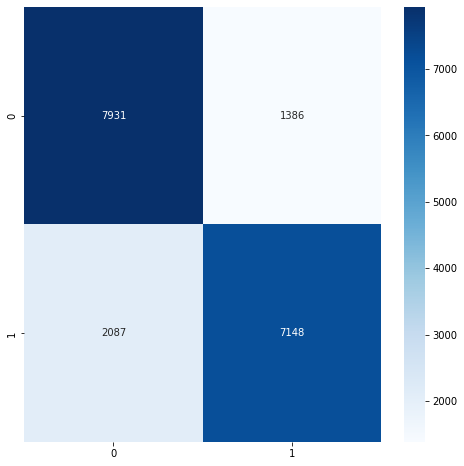

In [121]:
# confusion_matrix funnction a matrix containing the summary of predictions
cm = confusion_matrix(y_test, logreg_preds)
print(cm)

# plot confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.show()

In [122]:
# Lets use 5 folds cross validations for the logistic regression model
scores = cross_val_score(logreg, X_train, y_train, cv=5)
scores

<IPython.core.display.Javascript object>

array([0.80605462, 0.8188842 , 0.81502111, 0.81259545, 0.80477944])

In [123]:
# the mean score and the standard deviation are
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.81 accuracy with a standard deviation of 0.01


### K-Nearest Neighbors

In [124]:
# importing K Nearest Neighbor Classifier and GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

#check top performing n_neighbors value
print(knn_gscv.best_params_)

# knn_gscv
print(knn_gscv.best_score_)

{'n_neighbors': 2}
0.9720605436068217


In [125]:
# Lets use 5 folds cross validations for the logistic regression model
scores = cross_val_score(knn, X_train, y_train, cv=5)
scores

<IPython.core.display.Javascript object>

array([0.9379267 , 0.94133501, 0.9406163 , 0.9447489 , 0.94133501])

In [126]:
# the mean score and the standard deviation are
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.94 accuracy with a standard deviation of 0.00


In [127]:
# knn predictions
knn_preds = knn_gscv.predict(X_test)

[[8885  432]
 [   0 9235]]


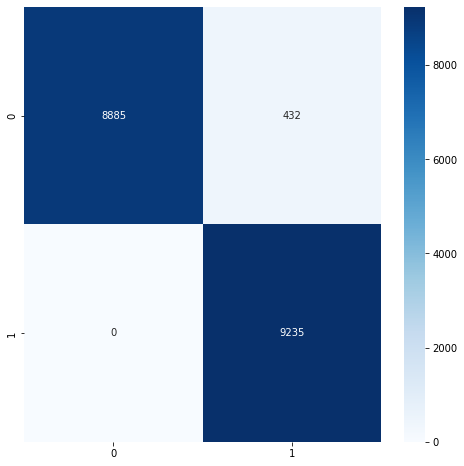

In [128]:
# confusion_matrix funnction a matrix containing the summary of predictions
cm = confusion_matrix(y_test, knn_preds)
print(cm)

# plot confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.show()

In [129]:
# classification report of knn model
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      9317
           1       0.96      1.00      0.98      9235

    accuracy                           0.98     18552
   macro avg       0.98      0.98      0.98     18552
weighted avg       0.98      0.98      0.98     18552



### Support Vector Machine

In [134]:
# importing support vector machine classifier
from sklearn.svm import SVC

# instance of the model
svc = SVC()

# cross validation with 5 folds
scores = cross_val_score(svc, X_train, y_train, cv=5)
print(scores)

# the mean score and the standard deviation are
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

<IPython.core.display.Javascript object>

[0.85061085 0.85940167 0.8567065  0.85886264 0.8496092 ]
0.86 accuracy with a standard deviation of 0.00


[[7807 1510]
 [1162 8073]]


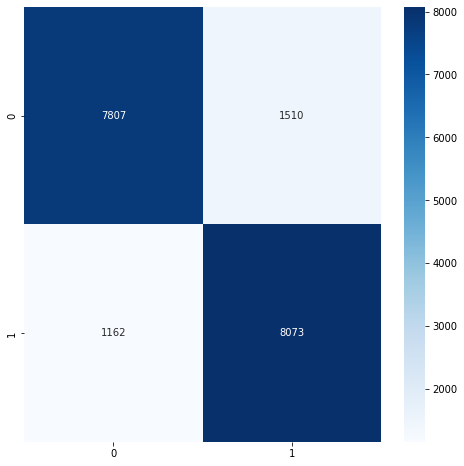

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      9317
           1       0.84      0.87      0.86      9235

    accuracy                           0.86     18552
   macro avg       0.86      0.86      0.86     18552
weighted avg       0.86      0.86      0.86     18552



In [135]:
# fitting the model
svc.fit(X_train, y_train)

# prediction of SVC 
svc_preds = svc.predict(X_test)

# confusion_matrix funnction a matrix containing the summary of predictions
cm = confusion_matrix(y_test, svc_preds)
print(cm)

# plot confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.show()

# classification report of knn model
print(classification_report(y_test, svc_preds))

### Random Forest 

In [136]:
# importing Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

# instance of the model
rf = RandomForestClassifier()

# cross validation with 5 folds
scores = cross_val_score(svc, X_train, y_train, cv=5)
print(scores)

# the mean score and the standard deviation are
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

<IPython.core.display.Javascript object>

[0.85061085 0.85940167 0.8567065  0.85886264 0.8496092 ]
0.86 accuracy with a standard deviation of 0.00


[[8958  359]
 [   0 9235]]


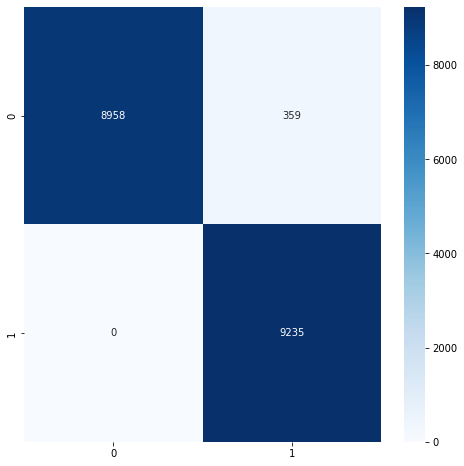

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      9317
           1       0.96      1.00      0.98      9235

    accuracy                           0.98     18552
   macro avg       0.98      0.98      0.98     18552
weighted avg       0.98      0.98      0.98     18552



In [137]:
# fitting the model 
rf.fit(X_train, y_train)

# prediction of rf 
rf_preds = rf.predict(X_test)

# confusion_matrix funnction a matrix containing the summary of predictions
cm = confusion_matrix(y_test, rf_preds)
print(cm)

# plot confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.show()

# classification report of knn model
print(classification_report(y_test, knn_preds))

In [157]:
# importing joblib
import joblib
 
# Save the trained model as a pickle string.
saved_model = joblib.dump(svc, "term_deposit_svc_model.pkl")

## Conclusion

After perfroming exploratory data analysis on the dataset. I've came to notice some few useful insights in targeting clients:
* Targeting clients with an age ranging between 31-46 is more likely to lead for a subscription.
* Most of the targeted clients are of the blue-collar and management even though they are more likely to decline. Instead, i'd recommend going after people in admin, services, retired, self-employed and entrepreneurs.
* People who are married are more likely to say no. So, single and divorced people are more likely to say yes.
* Also, people with no default credit are more likely to decline. 
* Looking at balance, people with balance exceeding 50,000 are going to decline.
* People with housing loans are likely to decline. 
* Instead of focusing on contacting clients mostly on May, months like Apr, Jun, Jul and Feb seems more promising.

Regarding the model, the __Support Vector Machine (SVM) Classifier__ model produced the best results with an average score of 0.86.  